Task 1: Read the lab notes and write down the purpose of each command in the this notebook.

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
digits.target[1:20]

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
digits.data.shape

(1797, 64)

In [6]:
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

In [7]:
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

In [8]:
digits.target[13]

3

In [9]:
import matplotlib.pyplot as plt

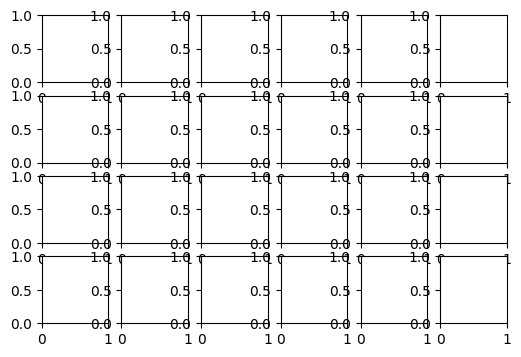

In [10]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

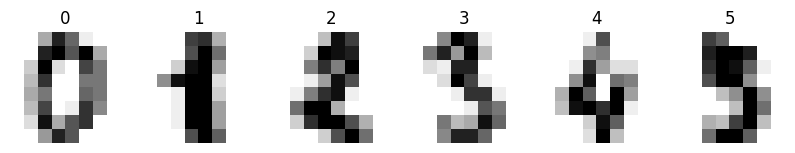

In [18]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for axes, image, target in zip(axes, digits.images, digits.target):
    axes.set_axis_off()
    axes.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    axes.set_title(target)

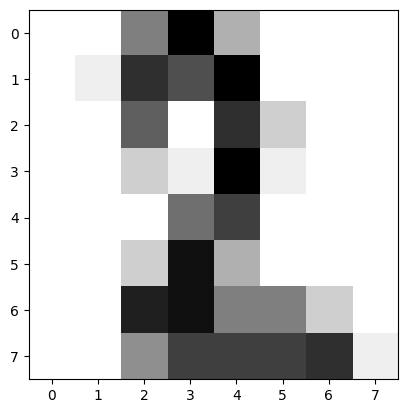

In [ ]:
image = plt.imshow(digits.images[22], cmap=plt.cm.gray_r)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=11, test_size=0.20)


In [ ]:
X_train.shape

(1437, 64)

In [ ]:
y_train.shape

(1437,)

In [ ]:
X_test.shape

(360, 64)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [ ]:
predicted = knn.predict(X=X_test)

In [ ]:
expected = y_test

In [ ]:
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [ ]:
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [ ]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

In [ ]:
wrong

[(5, 3), (8, 9), (4, 9), (7, 3), (7, 4)]

In [ ]:
print(f'{knn.score(X_test, y_test):.2%}')

98.61%


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [ ]:
confusion

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 35]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
names = [str(digit) for digit in digits.target_names]

In [ ]:
print(classification_report(expected, predicted,
          target_names=names))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        39
           3       1.00      0.95      0.97        41
           4       0.98      0.98      0.98        41
           5       0.96      1.00      0.98        27
           6       1.00      1.00      1.00        30
           7       0.95      1.00      0.97        36
           8       0.97      1.00      0.99        34
           9       1.00      0.95      0.97        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [ ]:
import pandas as pd

In [ ]:
confusion_df = pd.DataFrame(confusion, index=range(10),
         columns=range(10))

In [ ]:
import seaborn as sns

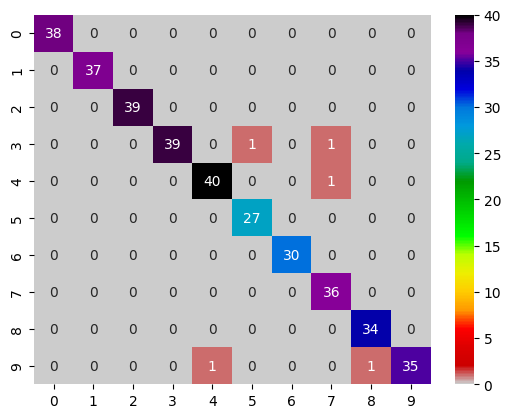

In [ ]:
axes = sns.heatmap(confusion_df, annot=True,
         cmap='nipy_spectral_r')

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(estimator=knn, X=digits.data,
    y=digits.target, cv=kfold)


In [ ]:
scores

In [ ]:
print(f'Mean accuracy: {scores.mean():.2%}')

In [ ]:
print(f'Accuracy standard deviation: {scores.std():.2%}')